In [17]:
#VGG-16code
#Import Necessary packages(?)

import os   #In python, use to copy files, make directory, change directory etc
import torch
import torch.nn as nn #nn stands for neural networks --> use attribute to make states
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
import torchvision        #torch vision packages include datasets, model architecture, image transformation etc
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import Dataset, DataLoader

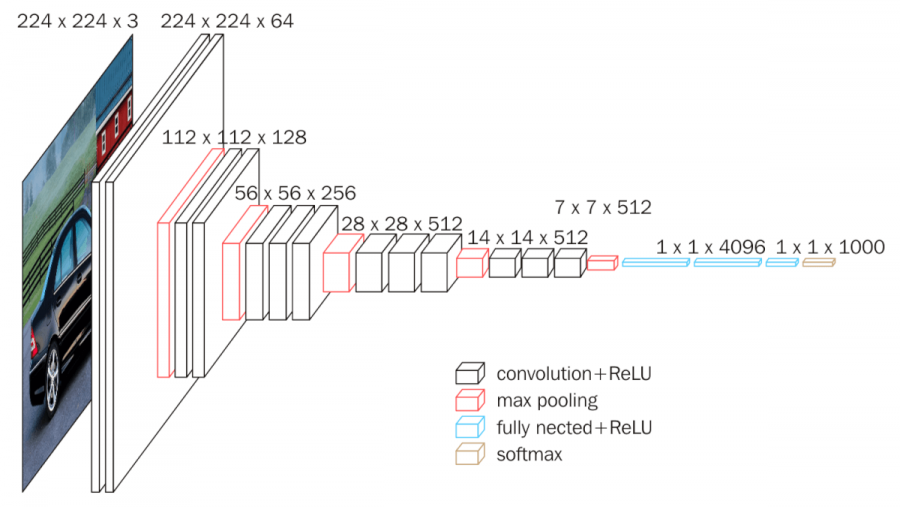

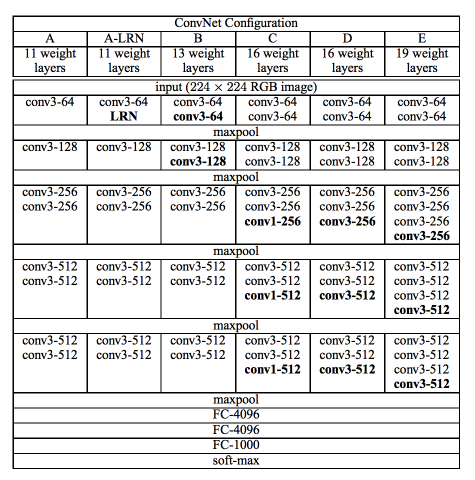

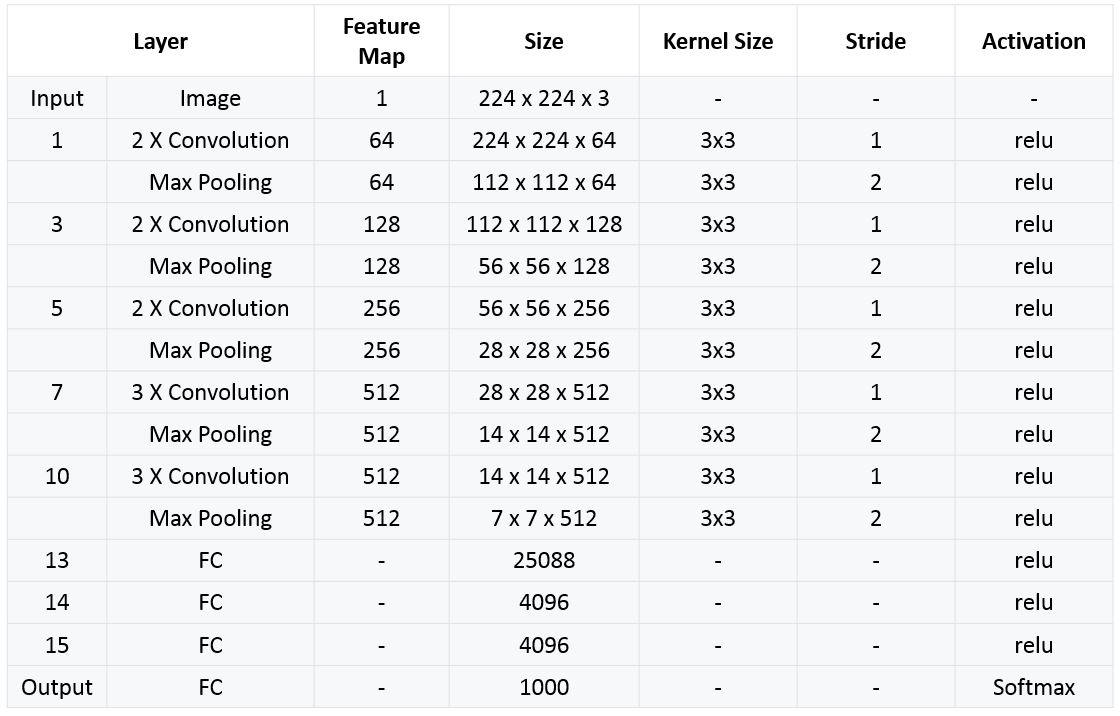

In [11]:
#VGGNet Architecture
import os 
os.getcwd() #check current directory
os.chdir('/Users/jaehyoyi/Desktop/') # move to Desktop directory
from IPython.display import Image, display
#cd /Users/jaehyoyi/Desktop
display(Image(filename='VGG.png'))
#picture from : https://blog.kakaocdn.net/dn/K990l/btqwDJ7C54R/664Ksm6gyTGBR1wK3YPDFk/img.png
display(Image(filename='VGG2.png'))
#picture from : https://pytorch.org/assets/images/vgg.png
display(Image(filename='VGG3.png'))
#picture from : https://www.kaggle.com/code/blurredmachine/vggnet-16-architecture-a-complete-guide

Output feature map size calculation

O = (I-F+2P)/S + 1

I : input feature map size

F : size of filter(kernel size) 3x3

P : padding, fill out edges

S : unit for how much convolution moves each time

In [34]:
#Define Convolutional block with 2 layers
#Reference from : https://velog.io/@euisuk-chung/파이토치-파이토치로-CNN-모델을-구현해보자-VGGNet편

def conv_2_block(in_dim, out_dim):
    #for example, in_dim = 224, out_dim = 112 
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2) #this reduces size of channel to half 
    )
    return model

#Note that for example 224-3+2/1 +1  = 224 which feature map size stays the same
#We add Maxpool layer at the end to 

In [33]:
#Define Convolutional block with 3 layers

def conv_3_block(in_dim, out_dim):
    model = nn.Sequential(
        nn.Conv2d(in_dim, out_dim, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(out_dim, out_dim, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2)
    )
    return model


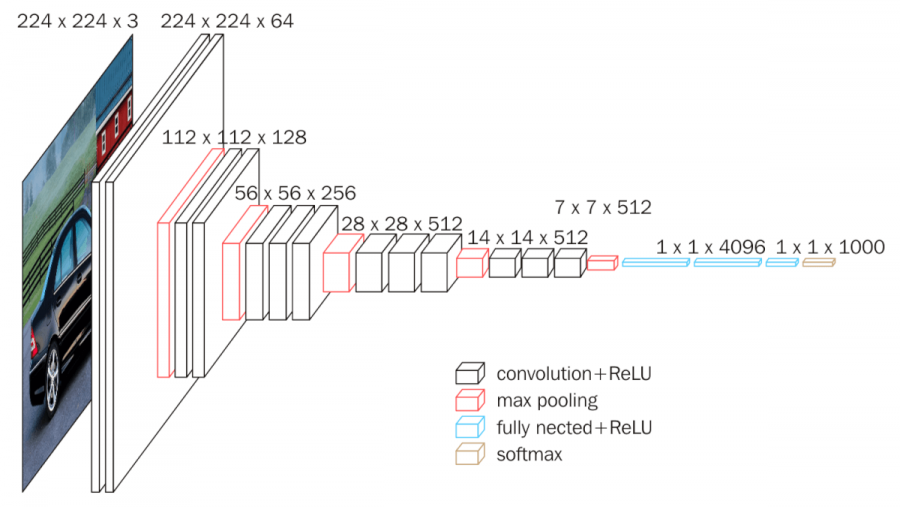

In [30]:
from IPython.display import Image, display
display(Image(filename='VGG.png'))
#picture from : https://blog.kakaocdn.net/dn/K990l/btqwDJ7C54R/664Ksm6gyTGBR1wK3YPDFk/img.png

In [31]:
#Define VGG-16

class VGG16(nn.Module):
    def __init__(self, base_dim, num_classes=10):   #num_classes depends on which dataset you use
        super(VGG16, self).__init__()
        self.feature = nn.Sequential(
            conv_2_block(3, base_dim), #64
            conv_2_block(base_dim, 2*base_dim), #128
            conv_3_block(2*base_dim, 4*base_dim), #256
            conv_3_block(4*base_dim, 8*base_dim), #512
            conv_3_block(8*base_dim, 8*base_dim), #512
        )
        #FC layer at the end for classifier
        self.fc_layer = nn.Sequential(
            #Note CIFAR-10 input is 32x32
            nn.Linear(8*base_dim*1*1, 4096), #1*1 is multiplied for Fully Connected layer <-- not sure, look up for more information
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 1000),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(1000, num_classes),
        )


        def forward(self,x):
            x = self.feature(x)
            #print(x.shape)
            x = x.view(x.size(0), -1)  #reform the size of x to (x(0), ?), ? stands for fit number
            #For example 3 dimension tensor with x=4x4x3 --> x.view([-1, 3]) stands for change it to 2 dimension (16,3)
            #print(x.shape)
            x = self.fc_layer(x)
            return x
        
        

In [35]:
#Define model, loss, optimizer
#Set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu" )

# Make VGG class as a instance(?) <-- search for more meaning later
model = VGG16(base_dim=64).to(device)

#Define loss and optimizer
batch_size = 100
learning_rate = 0.0002
num_epoch = 100
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [39]:
#Load CIFAR10 dataset
#CIFAR-10 dataset contains 10 different classes such as airplane, automible, bird, etc...
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

#Define transforms

transform  = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))   #Normalize([mean1, mean2, mean3], [std1, std2, std3])
     #normalize is used since pixel value 0~255 is transformed to 0~1, however we need this value to be in between -1~1
     ])

#Define CIFAR10 train set
cifar10_train = datasets.CIFAR10(root="../Data/", train = True, transform=transform,  target_transform=None, download=True)

#Define CIFAR10 test set
cifar10_train = datasets.CIFAR10(root="../Data/", train = False, transform=transform,  target_transform=None, download=True)


98.4%

In [ ]:
#Try to visualize some train dataset
#Refernce from pytorch tutorial : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

#function to show images
def imshow(img):    
    img = img/2 + 0.5 #unormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

 #randomly get train image
dataiter = iter(train_loader)
images, lables = dataiter.next()

#show image
imshow(torchvision.utils.make_grid(images))

#print labels
print(' '.join('%5s' % classes[lables[j]] for j in range(batch_size)))

    

In [ ]:
#Define training

loss_arr = []
for i in trange